In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KernelDensity
import pickle
import random

figures for roberto/ first paper in this series:
- panel one: Taste
    - inc. two plots of points (scattered, with mean as line). on x-axis, have labels for the area of the brain these recordings came from (GC vs S) (s = oral somatosensory fields). on y-axis, classification score. feature best 40 points or something.
    - seperately plot how the  mean in each plot changes as you add more and more points to the analysis (up to and inc. top 68 points, since smallest dataset only has 68)
- second panel is the same, but for temperature

Data suggests so far that this should lead to statistically significant difference in mean for taste information, but insignficiant (or with very small significance) difference in temperature classification score. 

In [2]:
path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks'
GCtempNVS = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_temps_alphapoint875.pkl')
STXtempNVS = pd.read_pickle(f'{path}/BA_STXDat/STX_TEMPboth_alphapoint625_nvs.pkl')

# now combine these
GCtasteNVS = pd.read_pickle(f'{path}/BA_TasteDat/BayesScores_taste_nowater_alphapoint875.pkl')
STXtasteNVS = pd.read_pickle(f'{path}/BA_STXDat/STX_TasteSessions_alphapoint625_nvs.pkl')


In [3]:
STXtasteNVS = STXtasteNVS[np.argsort(STXtasteNVS[:, 1])[::-1]][:50]
GCtasteNVS = GCtasteNVS[np.argsort(GCtasteNVS[:, 1])[::-1]][:50]
GCtempNVS = GCtempNVS[np.argsort(GCtempNVS[:, 1])[::-1]][:50]
STXtempNVS = STXtempNVS[np.argsort(STXtempNVS[:, 1])[::-1]][:50]

In [4]:
STXtasteNVS

array([[21.        ,  0.37777778],
       [50.        ,  0.36666667],
       [13.        ,  0.36111111],
       [31.        ,  0.35555556],
       [53.        ,  0.34      ],
       [28.        ,  0.33333333],
       [15.        ,  0.32222222],
       [46.        ,  0.32222222],
       [ 8.        ,  0.31666667],
       [23.        ,  0.30555556],
       [22.        ,  0.28888889],
       [63.        ,  0.28888889],
       [62.        ,  0.28148148],
       [52.        ,  0.27777778],
       [ 2.        ,  0.27777778],
       [25.        ,  0.27222222],
       [ 7.        ,  0.26666667],
       [11.        ,  0.26666667],
       [42.        ,  0.26111111],
       [44.        ,  0.26111111],
       [ 5.        ,  0.26111111],
       [12.        ,  0.26111111],
       [24.        ,  0.25555556],
       [20.        ,  0.25555556],
       [56.        ,  0.25333333],
       [17.        ,  0.25      ],
       [16.        ,  0.25      ],
       [45.        ,  0.24444444],
       [48.        ,

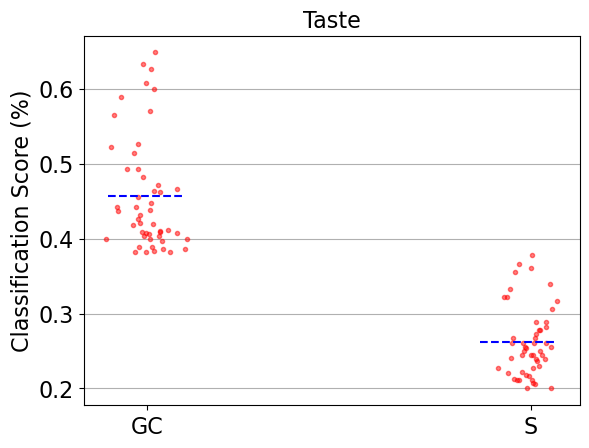

In [5]:
#panel one: taste


fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.set_xticks([0.7, 1.7]) 
ax.set_xticklabels(['GC','S'],fontsize=16)
ax.set_ylabel('Classification Score (%)',fontsize=16)
ax.set_title('Taste', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

# Adding individual data points as jittered points
for i, scores in enumerate([GCtasteNVS[:,1], STXtasteNVS[:,1]]):
    x = np.random.normal(i + 1 - 0.3, 0.04, size=len(scores))  # Adjusted x positions
    ax.plot(x, scores, '.', color='red', alpha=0.5)

mean1 = np.mean(GCtasteNVS[:,1])
mean2 = np.mean(STXtasteNVS[:,1])

ax.axhline(y=mean1, color='blue', linestyle='--', label=f'Mean: {mean1:.4f}', xmin=0.05, xmax=0.2)
ax.axhline(y=mean2, color='blue', linestyle='--', label=f'Mean: {mean2:.4f}', xmin=0.8, xmax=0.95)

ax.grid(axis='x', linestyle='')
plt.grid(True)
plt.show()

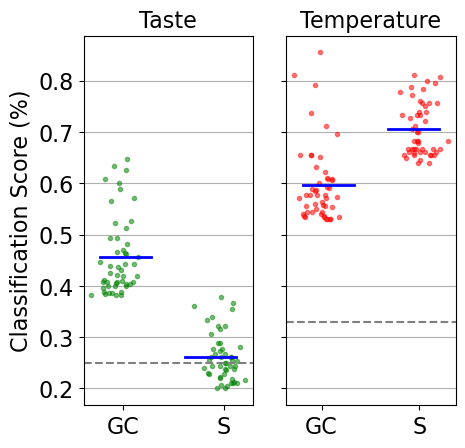

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming GCtasteNVS and STXtasteNVS are already defined numpy arrays
# Replace them with the actual data if not already defined
# GCtasteNVS = np.random.rand(10, 2)
# STXtasteNVS = np.random.rand(10, 2)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(4.8, 4.8), sharey=True)

# First panel
ax1.set_xticks([1.35, 2.3])
ax1.set_xticklabels(['GC', 'S'], fontsize=16)
ax1.set_ylabel('Classification Score (%)', fontsize=16)
ax1.set_title('Taste', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)

# Adding individual data points as jittered points
for i, scores in enumerate([GCtasteNVS[:,1], STXtasteNVS[:,1]]):
    x = np.random.normal(i + 1 + 0.3, 0.1, size=len(scores))  # Adjusted x positions
    ax1.plot(x, scores, '.', color='green', alpha=0.5)

mean1 = np.mean(GCtasteNVS[:,1])
mean2 = np.mean(STXtasteNVS[:,1])

ax1.axhline(y=mean1, color='blue', linestyle='-',linewidth=2, label=f'Mean: {mean1:.4f}', xmin=0.1, xmax=0.4)
ax1.axhline(y=mean2, color='blue', linestyle='-',linewidth=2, label=f'Mean: {mean2:.4f}', xmin=0.6, xmax=0.9)
ax1.axhline(y=0.25, color='grey', linestyle='--')
ax1.grid(True)
ax1.grid(axis='x', linestyle='')
#ax1.legend()

# Second panel (duplicate of the first one)
ax2.set_xticks([1.35, 2.3])
ax2.set_xticklabels(['GC', 'S'], fontsize=16)
#ax2.set_ylabel('Classification Score (%)', fontsize=16)
ax2.set_title('Temperature', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

# Adding individual data points as jittered points
for i, scores in enumerate([GCtempNVS[:,1], STXtempNVS[:,1]]):
    x = np.random.normal(i + 1 + 0.3, 0.1, size=len(scores))  # Adjusted x positions
    ax2.plot(x, scores, '.', color='red', alpha=0.5)

mean1 = np.mean(GCtempNVS[:,1])
mean2 = np.mean(STXtempNVS[:,1])

ax2.axhline(y=mean1, color='blue', linestyle='-',linewidth=2, label=f'Mean: {mean1:.4f}', xmin=0.1, xmax=0.4)
ax2.axhline(y=mean2, color='blue', linestyle='-',linewidth=2, label=f'Mean: {mean2:.4f}', xmin=0.6, xmax=0.9)

ax2.grid(axis='x', linestyle='')
ax2.axhline(y=0.33, color='grey', linestyle='--')
#ax2.legend()
plt.savefig('GCvsScomparisons.svg', format='svg')
plt.grid(True)
plt.show()


In [7]:
from scipy.stats import ttest_ind

t_stat1, p_val1 = ttest_ind(GCtasteNVS[:,1], STXtasteNVS[:,1])
t_stat2, p_val2 = ttest_ind(GCtempNVS[:,1], STXtempNVS[:,1])

print(f"Taste t-test results: t-statistic = {t_stat1:.4f}, p-value = {p_val1}")
print(f"Temp t-test results: t-statistic = {t_stat2:.4f}, p-value = {p_val2}")

Taste t-test results: t-statistic = 15.5124, p-value = 3.898281195497793e-28
Temp t-test results: t-statistic = -8.3976, p-value = 3.570612832549057e-13


Above suggests that the means of both populations show a statistically significant difference from eachother. (very small p values suggests strong evidence to reject the null hypothesis, meaning the observed difference between these two groups was unlikely to have occured by random chance alone)

Below, let's check the means against random guessing and see the statistical signficance here:

In [8]:
from scipy.stats import ttest_1samp

t_stat_gc, p_val_gc = ttest_1samp(GCtasteNVS[:,1], 0.25)
t_stat_stx, p_val_stx = ttest_1samp(STXtasteNVS[:,1], 0.25)

print(f"tasteGC t-test results: t-statistic = {t_stat_gc}, p-value = {p_val_gc}")
print(f"tasteS1 t-test results: t-statistic = {t_stat_stx}, p-value = {p_val_stx}")

t_stat_gc_dup, p_val_gc_dup = ttest_1samp(GCtempNVS[:,1], 0.333)
t_stat_stx_dup, p_val_stx_dup = ttest_1samp(STXtempNVS[:,1], 0.333)

print(f"tempGC t-test results: t-statistic = {t_stat_gc_dup}, p-value = {p_val_gc_dup}")
print(f"tempS1 t-test results: t-statistic = {t_stat_stx_dup}, p-value = {p_val_stx_dup}")

tasteGC t-test results: t-statistic = 19.32478098310882, p-value = 1.4410124860861543e-24
tasteS1 t-test results: t-statistic = 1.760750198714966, p-value = 0.08452068193368055
tempGC t-test results: t-statistic = 24.924900838717925, p-value = 1.7275609289405333e-29
tempS1 t-test results: t-statistic = 51.071201587694624, p-value = 3.7123361789610703e-44


In [9]:
np.mean(STXtasteNVS[:,1])

0.2616592592592592

### Make two-temp comparison boxplots and two-way ANOVA between the data

In [12]:
import matplotlib.patches as mpatches

In [13]:
#open file with cold vs hot scores (temp codes 0 vs 1)
path = 'C:/Users/anash/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks'
coldhot = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_01_alphapoint875.pkl')
coldrt = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_02_alphapoint875.pkl')
rthot = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_21_alphapoint875.pkl')
#open file with quinine vs sucrose scores (tastes codes 2 vs 3)
dataset2_scores = pd.read_pickle(f'{path}/BA_STXDat/STX_TempSessions_t01_alphapoint625_nvs.pkl')

dataset3_scores = pd.read_pickle(f'{path}/BA_STXDat/STX_TempSessions_t02_alphapoint625_nvs.pkl')
dataset4_scores = pd.read_pickle(f'{path}/BA_STXDat/STX_TempSessions_t21_alphapoint625_nvs.pkl')

# Example data (replace this with your actual datasets)
dataset1_scores = np.sort(coldhot[:,1])[::-1][:int(0.2*len(coldhot[   :,1]))]
dataset2_scores = np.sort(dataset2_scores[:,1])[::-1][:int(0.2*len(dataset2_scores[:,1]))]
dataset3_scores = np.sort(dataset3_scores[:,1])[::-1][:int(0.2*len(dataset3_scores[:,1]))]
dataset4_scores = np.sort(dataset4_scores[:,1])[::-1][:int(0.2*len(dataset4_scores[:,1]))]
dataset8_scores = np.sort(coldrt[:,1])[::-1][:int(0.2*len(coldrt[:,1]))]
dataset9_scores = np.sort(rthot[:,1])[::-1][:int(0.2*len(rthot[:,1]))]


In [14]:
# Create the 'Temp pair' column
temp_pair = ['01'] * len(dataset1_scores) + ['02'] * len(dataset8_scores) + ['21'] * len(dataset9_scores) + \
            ['01'] * len(dataset2_scores) + ['02'] * len(dataset3_scores) + ['21'] * len(dataset4_scores)

# Create the 'cortex' column
cortex = [0] * (len(dataset1_scores) + len(dataset8_scores) + len(dataset9_scores)) + \
         [1] * (len(dataset2_scores) + len(dataset3_scores) + len(dataset4_scores))

# Combine all the scores into a single list
scores = np.concatenate([dataset1_scores, dataset8_scores, dataset9_scores, 
                         dataset2_scores, dataset3_scores, dataset4_scores])

# Create the DataFrame
df = pd.DataFrame({
    'Temp pair': temp_pair,
    'cortex': cortex,
    'score': scores
})

# Now df contains the structured data
print(df)

    Temp pair  cortex     score
0          01       0  1.000000
1          01       0  1.000000
2          01       0  1.000000
3          01       0  0.988889
4          01       0  0.966667
..        ...     ...       ...
529        21       1  0.708333
530        21       1  0.708333
531        21       1  0.704762
532        21       1  0.700000
533        21       1  0.700000

[534 rows x 3 columns]


In [16]:
means_list = [np.mean(dataset1_scores),np.mean(dataset2_scores),np.mean(dataset3_scores),np.mean(dataset4_scores),np.mean(dataset8_scores),np.mean(dataset9_scores)]
dataset_list = [(dataset1_scores),(dataset8_scores),(dataset9_scores),(dataset2_scores),(dataset3_scores),(dataset4_scores)]

In [17]:
combined_temps = np.column_stack(((dataset1_scores),(dataset8_scores),(dataset9_scores)))
taste_data = np.column_stack(((dataset2_scores),(dataset3_scores),(dataset4_scores)))

In [18]:
np.savetxt('fig8c_GCtempvalues.csv', combined_temps, delimiter=',', fmt='%f')
np.savetxt('fig8c_Stempdat.csv', taste_data, delimiter=',', fmt='%f')

In [19]:
#do 2sided ttest for all means compared to dataset 1 
    # (the mean of the underlying distribution of the sample (a, first param) 
    # is different than the given population mean (popmean, second param.))

from scipy import stats    
    
for i in range(1,len(means_list)):
    print(stats.ttest_ind(dataset_list[0],dataset_list[i], equal_var=False))

TtestResult(statistic=13.038230941399927, pvalue=1.2162750188771912e-26, df=153.74368976927727)
TtestResult(statistic=5.18569183183335, pvalue=6.061032781249991e-07, df=169.99999625690302)
TtestResult(statistic=-3.2603497587259334, pvalue=0.0013930652785523248, df=141.98198473053085)
TtestResult(statistic=-1.4039698173383885, pvalue=0.16237357311784437, df=151.56395424543527)
TtestResult(statistic=3.807353144496497, pvalue=0.00019956356381599396, df=160.44812054335398)


From the documentation:
- 'The statistic is calculated as (np.mean(a) - popmean)/se, where se is the standard error. Therefore, the statistic will be positive when the sample mean is greater than the population mean and negative when the sample mean is less than the population mean.'
    - this means that, as we see in the figure below, every one of the other datasets (2-9) has a lower mean than the first dataset.
- we are comparing against a significance value of like,, 0.00625 or something similar. so all of these are much lower than this, showing that we can accept the 2-sided t ttest assumption

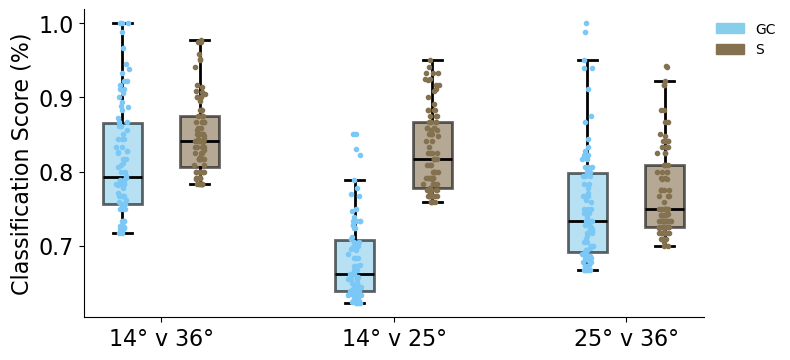

In [29]:
import matplotlib.patches as mpatches

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

# Box plot positions
positions = [1, 2, 4, 5, 7, 8]

# Box plot with no flyers (open circles)
boxplot = ax.boxplot(
    [dataset1_scores, dataset2_scores, dataset8_scores, dataset3_scores, dataset9_scores, dataset4_scores], 
    positions=positions, patch_artist=True, showmeans=False, 
    medianprops=dict(color='black', linewidth=2),  # Set median line to black
    boxprops=dict(linewidth=2),  # Thicker box lines
    whiskerprops=dict(linewidth=2),  # Thicker whiskers
    capprops=dict(linewidth=2),  # Thicker caps
    flierprops=dict(marker=''))  # Suppress flyer (outlier) circles

# Set x-ticks and labels
ax.set_xticks([1.5, 4.5, 7.5])  # Center ticks between boxplot groups
ax.set_xticklabels([r'$14\degree$ v $36\degree$', r'$14\degree$ v $25\degree$', r'$25\degree$ v $36\degree$'], fontsize=16)
ax.set_ylabel('Classification Score (%)', fontsize=16)
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels([0.6, 0.7, 0.8, 0.9, 1.0], fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

# Customizing box colors for GC and S datasets with alpha=0.7
colors = ['#87CEEB', '#84714F', '#87CEEB', '#84714F', '#87CEEB', '#84714F']  # GC: light blue, S: brownish
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)  # Set alpha to 0.7 for the box faces

# Adding individual data points as jittered points with alpha=1.0
for i, (pos, scores) in enumerate(zip(positions, [dataset1_scores, dataset2_scores, dataset8_scores, dataset3_scores, dataset9_scores, dataset4_scores])):
    if i in [0, 2, 4]:  # GC datasets
        scatter_color = '#7BC8F6'
    else:  # S datasets
        scatter_color = '#84714F'
    x = np.random.normal(pos, 0.04, size=len(scores))  # Adjusted x positions based on boxplot positions
    ax.plot(x, scores, '.', color=scatter_color, alpha=1.0, zorder=3)  # Set alpha=1.0 for scatter points

# Adding legend
gc_patch = mpatches.Patch(color='#87CEEB', label='GC')
s_patch = mpatches.Patch(color='#84714F', label='S')
plt.legend(handles=[gc_patch, s_patch], loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Removing unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding grid
#plt.grid(True)

# Save the figure
plt.savefig('GCvsSTXtempdoubles.svg', format='svg')

# Show the plot
plt.show()


In [30]:
len(dataset1_scores)

86

In [31]:
len(dataset2_scores)

92